# KNN exercise with NBA player data

## Introduction

- NBA player statistics from 2014-2015 (partial season): [data](https://github.com/JamesByers/GA-SEA-DAT1/blob/master/data/NBA_players_2015.csv), [data dictionary](https://github.com/JamesByers/GA-SEA-DAT1/blob/master/slides/07_nba_paper.pdf)
- **Problem to solve:** Predict player position using assists, steals, blocks, turnovers, and personal fouls

## Step 1: Read the data into Pandas

In [2]:
# read the data into a DataFrame named nba
import pandas as pd
path = '/GA-SEA-DAT2/data/'
url = path + 'NBA_players_2015.csv'
nba = pd.read_csv(url, index_col=0)

In [4]:
# examine the columns names to see what's there
nba.shape

(478, 49)

In [6]:
nba.describe()

,season_end,age,g,gs,mp,fg,fga,fg_,x3p,x3pa,...,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP
count,478.0,478.000000,478.000000,478.000000,478.000000,478.000000,478.000000,478.000000,478.000000,478.000000,...,478.000000,478.000000,478.000000,478.000000,478.000000,478.000000,478.000000,478.000000,478.000000,478.000000
mean,2015.0,26.573222,42.104603,19.874477,20.045607,3.018201,6.847699,0.429230,0.630544,1.855649,...,13.424268,18.915272,1.055858,0.971339,2.027197,0.073575,-1.396862,-0.495816,-1.892678,0.485983
std,0.0,4.219585,18.950602,22.170034,9.313441,2.052790,4.386828,0.111007,0.665808,1.790564,...,6.559989,5.493491,1.589667,0.876932,2.243138,0.133530,4.251216,2.299572,5.116001,1.013097
min,2015.0,19.000000,1.000000,0.000000,0.700000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,-2.100000,-0.100000,-0.800000,-1.059000,-36.800000,-13.500000,-50.300000,-1.000000
25%,2015.0,23.000000,27.000000,0.000000,12.600000,1.425000,3.400000,0.391000,0.000000,0.100000,...,10.000000,14.800000,0.000000,0.200000,0.300000,0.040250,-2.800000,-1.600000,-3.300000,-0.100000
50%,2015.0,26.000000,47.000000,10.500000,19.850000,2.700000,5.900000,0.432000,0.450000,1.400000,...,12.900000,18.400000,0.600000,0.800000,1.400000,0.082500,-1.000000,-0.500000,-1.300000,0.100000
75%,2015.0,29.000000,59.000000,39.000000,28.175000,4.275000,9.600000,0.481750,1.000000,3.075000,...,15.900000,21.900000,1.600000,1.500000,3.000000,0.123000,0.500000,0.875000,0.500000,0.700000
max,2015.0,38.000000,66.000000,66.000000,38.900000,9.500000,21.400000,1.000000,3.400000,8.000000,...,100.000000,45.900000,9.500000,4.300000,13.000000,1.489000,28.300000,6.500000,15.100000,6.200000


In [7]:
nba.head(5)

,season_end,player,pos,age,bref_team_id,g,gs,mp,fg,fga,...,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP
0,2015,Quincy Acy,F,24,NYK,52,21,19.2,2.2,4.6,...,15.1,14.7,0.6,0.5,1.0,0.050,-2.6,-0.7,-3.4,-0.3
1,2015,Jordan Adams,G,20,MEM,18,0,7.3,1.0,2.1,...,15.9,17.7,0.0,0.2,0.2,0.076,-2.3,1.8,-0.5,0.0
2,2015,Steven Adams,C,21,OKC,51,50,24.2,3.0,5.5,...,19.2,14.8,1.0,1.8,2.8,0.109,-2.0,2.0,-0.1,0.6
3,2015,Jeff Adrien,F,28,MIN,17,0,12.6,1.1,2.6,...,12.9,14.1,0.2,0.2,0.4,0.093,-2.6,0.8,-1.8,0.0
4,2015,Arron Afflalo,G,29,TOT,60,54,32.5,5.0,11.8,...,10.9,19.6,1.4,0.7,2.1,0.051,-0.2,-1.4,-1.6,0.2


G    200
F    199
C     79
Name: pos, dtype: int64

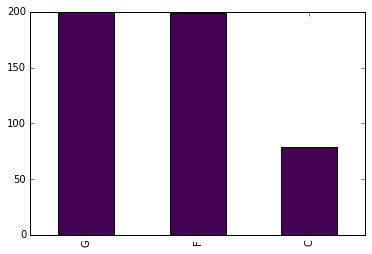

In [63]:
# examine the number of players in each position to get a feel for the data
#nba.groupby('pos').mean().plot(kind='bar')
#drinks.continent.value_counts().plot(kind='bar')

# allow plots to appear in the notebook
%matplotlib inline
import matplotlib.pyplot as plt

nba.pos.value_counts().plot(kind='bar', colormap='viridis')

nba.pos.value_counts()

## Step 2: Create X and y

Use the following features: assists, steals, blocks, turnovers, personal fouls

In [17]:
# map positions to numbers
# Specifically map the position names (C, F and G) to numbers starting with 0
#   and store them in a new column named 'pos_num'.
# We need to do this because KNN model algorithms require that the features
#   and responses be numeric.
nba['pos_num'] = nba.pos.map({'C':0, 'F':1, 'G':2})

In [38]:
# create feature matrix (X) (it is a dataframe) that contains these columns from the nba dataframe:
# 'ast', 'stl', 'blk', 'tov', 'pf'
features = ['ast', 'stl', 'blk', 'tov', 'pf']
X = nba[features]
print(X)

      ast  stl  blk  tov   pf
0     1.0  0.4  0.3  0.9  2.2
1     0.4  0.4  0.3  0.4  0.8
2     1.0  0.4  1.2  1.6  3.0
3     0.9  0.2  0.5  0.5  1.8
4     1.9  0.6  0.1  1.6  2.1
5     0.6  0.3  0.7  1.0  2.3
6     0.6  0.4  0.4  0.4  1.8
7     1.0  0.6  0.9  1.0  2.1
8     1.8  0.7  1.0  1.8  1.9
9     1.3  0.3  0.8  0.7  1.8
10    1.4  2.0  0.5  1.3  2.8
11    0.7  1.0  0.9  0.7  1.8
12    1.2  0.4  0.9  0.8  2.5
13    0.7  0.5  1.0  0.5  1.6
14    1.1  0.7  0.1  0.8  1.9
15    1.0  0.5  0.3  0.4  1.0
16    1.0  0.6  0.3  1.1  2.0
17    2.5  1.1  1.1  2.2  3.0
18    3.1  1.0  0.4  2.2  2.2
19    0.1  0.2  0.6  0.2  0.9
20    0.9  0.2  0.3  0.9  2.1
21    2.4  1.9  0.2  1.7  2.4
22    0.9  0.8  0.5  0.8  2.5
23    0.9  0.4  0.8  1.3  1.9
24    4.7  0.7  0.0  1.9  1.2
25    0.3  0.2  0.2  0.4  1.2
26    0.4  0.3  0.2  0.4  1.1
27    0.1  0.1  0.1  0.2  0.6
28    1.1  0.6  0.1  0.7  1.4
29    3.3  0.4  0.0  0.9  1.3
..    ...  ...  ...  ...  ...
448  10.0  1.8  0.6  3.7  2.3
449   0.2 

In [39]:
# create response vector (y) that contains the position numbers (our labels)
y = nba.pos_num
print(y)

0      1
1      2
2      0
3      1
4      2
5      0
6      1
7      0
8      1
9      1
10     2
11     1
12     1
13     0
14     2
15     1
16     1
17     2
18     1
19     0
20     1
21     1
22     1
23     0
24     2
25     1
26     1
27     1
28     2
29     2
      ..
448    2
449    1
450    1
451    2
452    1
453    1
454    1
455    2
456    0
457    1
458    2
459    2
460    2
461    1
462    2
463    2
464    1
465    2
466    1
467    1
468    0
469    2
470    1
471    1
472    2
473    2
474    2
475    1
476    0
477    0
Name: pos_num, dtype: int64


## Step 3: Train a KNN model (K=5)

In [40]:
# import KNN class we need from scikit-learn
from sklearn.neighbors import KNeighborsClassifier

In [70]:
# make an instance of a KNeighborsClassifier object, this creates an object that will do KNN classification, 
#it's a mini app or script that now needs data 
#name of the object does not matter
knn = KNeighborsClassifier(n_neighbors=5) #note that n_neighbors=1 is a hyperparameter that is set ahead of time
#think of this like setting the options for SV<M in Azure ML 
type(knn)

sklearn.neighbors.classification.KNeighborsClassifier

In [71]:
# run a knn.fit on the data to build the model
knn.fit(X,y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

## Step 4: Use the model:
## Predict player position and calculate predicted probability of each position

Predict for a player with these statistics: 1 assist, 1 steal, 0 blocks, 1 turnover, 2 personal fouls

In [72]:
# create a list to represent a player
#for passing a single, new value, needs to be a list of lists to avoid a deprecation error
player = [[1, 1, 0, 1, 2]]

In [73]:
# make a prediction with the model
knn.predict(player)

array([2], dtype=int64)

In [74]:
# calculate the predicted probabilities
knn.predict_proba(player)



array([[ 0. ,  0.2,  0.8]])

## Step 5: Repeat steps 3 and 4 using K=50

In [46]:
# repeat for K=50
knn = KNeighborsClassifier(n_neighbors=50)

In [47]:
# calculate predicted probabilities
knn.fit(X,y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=50, p=2,
           weights='uniform')

In [68]:
knn.predict(player)

array([1], dtype=int64)

In [69]:
knn.predict_proba(player)

array([[ 0.06,  0.62,  0.32]])

## Bonus: Explore the features to ones ones that likely are the most predictive

In [50]:
# allow plots to appear in the notebook
%matplotlib inline
import matplotlib.pyplot as plt

# increase default figure and font sizes for easier viewing
plt.rcParams['figure.figsize'] = (6, 4)
plt.rcParams['font.size'] = 14

In [90]:
# get a describe of assists grouped by position.  Use .unstack() to format the output
x.describe()

assists = ['ast', 'pos']

assist = nba[assists]

#assist.groupby('pos').describe()

nba.ast.describe().unstack()

AttributeError: 'Index' object has no attribute 'labels'

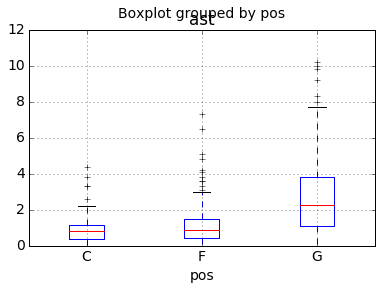

In [61]:
# box plot of assists grouped by position
assist.boxplot(column='ast', by='pos')


pos
C    Axes(0.125,0.125;0.775x0.775)
F    Axes(0.125,0.125;0.775x0.775)
G    Axes(0.125,0.125;0.775x0.775)
dtype: object

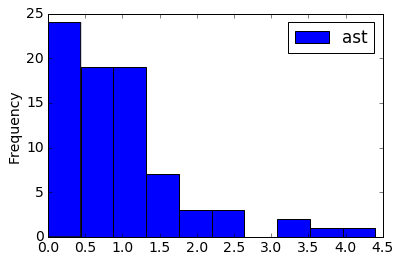

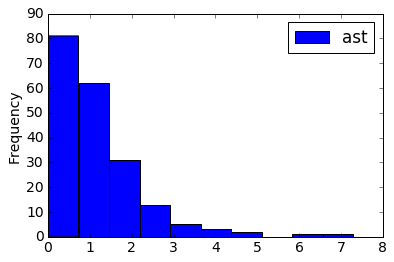

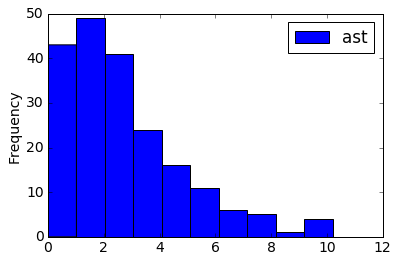

In [62]:
# group plot of histograms of assists grouped by position
assist.groupby('pos').plot(kind='hist')